In [2]:
import math
import random
import os

import numpy as np

from comet_ml import API
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats

COMET_API_KEY="bSyRm6vJpAwfehizXic7Fo0bY"
COMET_REST_API_KEY="S3g50KZWG8zEgk1PLzKUn0eEq"
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


# DQN - Gridworld

In [150]:
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
results = {
    'fame': {},
    'baseline': {},
    'distral': {}
}
reward_keys = ['episode_reward.n0', 'episode_reward.n1', 'episode_reward.n2']

for tag in results.keys():
    for ep_reward_key in reward_keys:
        results[tag][ep_reward_key] = []


In [265]:

env_params = ''
for exp in client.get("jh-jl-rlfl/dqn-gridworldenv"):
    params = client.get_experiment_parameters(exp)
    metrics = client.get_experiment_metrics_raw(exp)
    tag = client.get_experiment_tags(exp)[0]
    if 'env_params' not in [p['name'] for p in params]:
        continue
    env = next(p for p in params if p['name'] == 'env_params')['valueMax']
    if env != '[4,5,7]':
        continue
    env_params = env
   
    rewards = {}
    for ep_reward_key in reward_keys:
        rewards[ep_reward_key] = []
    
    
    
    for metric in metrics:
        if metric['metricName'] in reward_keys:
            rewards[metric['metricName']].append(float(metric['metricValue']))
    
    for ep_reward_key in reward_keys:
        # now that we have all the episode rewards, copy them to the root results:
        results[tag][ep_reward_key].append(rewards[ep_reward_key])

        

In [266]:
env_params = [int(n) for n in env_params.replace("'",'').replace(']','').replace('[','').split(',')]

In [286]:
colors = [['red', 'darkred', 'brown'],['blue', 'darkblue', 'aqua'], ['green', 'darkgreen', 'lightgreen']]
N=20


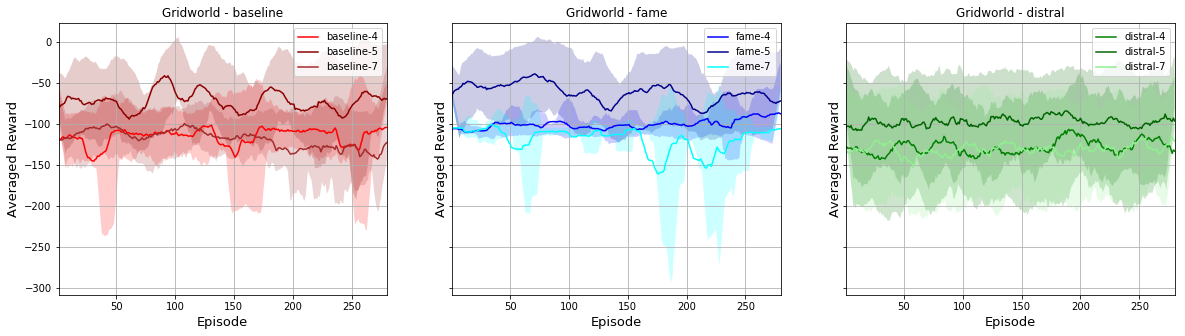

In [285]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)
for color_idx, algorithm in enumerate(['baseline','fame','distral']):
    for idx, (key, result_set) in enumerate(results[algorithm].items()):
        result_set = [s for s in result_set if len(s) == 300]
        std = np.std(result_set, axis=0)
        ys_mean = np.mean(result_set, axis=0)
        upper = [ys_mean[idx] + std for idx,std in enumerate(std)]
        lower = [ys_mean[idx] - std for idx,std in enumerate(std)]
        ys_mean = np.convolve(ys_mean, np.ones((N,))/N, mode='valid')
        xs = np.arange(len(ys_mean))
        axs[color_idx].plot(xs, ys_mean, label=f'{algorithm}-{env_params[idx]}', color=colors[color_idx][idx])
        axs[color_idx].fill_between(xs, smooth(upper[:281],15), smooth(lower[:281],15), where=upper>=lower,  facecolor=colors[color_idx][idx],  interpolate=True, alpha=0.2)
        axs[color_idx].set_title(f"Gridworld - {algorithm}")
        axs[color_idx].set_xlabel("Episode", fontsize=13)
        axs[color_idx].set_ylabel("Averaged Reward", fontsize=13)
        axs[color_idx].grid()
        axs[color_idx].legend()
        axs[color_idx].set_xlim(1,280)
plt.show()

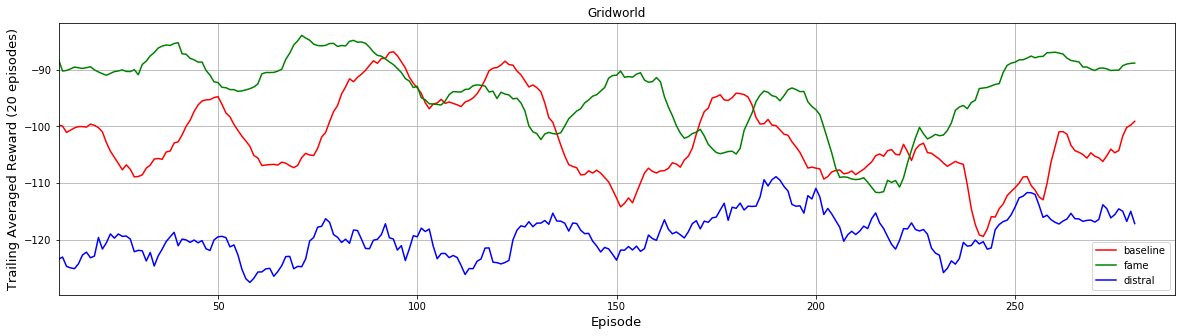

In [245]:

fig, axs = plt.subplots(1,1, figsize=(20,5), sharey=True)
colors = ['red','green', 'blue']
for color_idx, algorithm in enumerate(['baseline','fame','distral']):
    algorithm_avg = []
    for idx, (key, result_set) in enumerate(results[algorithm].items()):
        result_set = [s for s in result_set if len(s) == 300]
        algorithm_avg.append(np.mean(result_set, axis=0))
    ys_mean = np.mean(algorithm_avg, axis=0)
    N=20
    ys_mean = np.convolve(ys_mean, np.ones((N,))/N, mode='valid')
    axs.plot(xs[:281], ys_mean, label=f'{algorithm}', color=colors[color_idx])
    axs.set_title(f"Gridworld")
    axs.set_xlabel("Episode", fontsize=13)
    axs.set_ylabel("Trailing Averaged Reward (20 episodes)", fontsize=13)
    axs.grid()
    axs.legend()
    axs.set_xlim(10,290)


# DDPG - Gravity Pendulum

In [331]:
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
results = {
    'fame': {},
    'baseline': {}
}
reward_keys = ['episode_reward.n0', 'episode_reward.n1', 'episode_reward.n2']

for tag in results.keys():
    for ep_reward_key in reward_keys:
        results[tag][ep_reward_key] = []

for exp in client.get("jh-jl-rlfl/ddpg-gravitypendulum"):
    params = client.get_experiment_parameters(exp)
    metrics = client.get_experiment_metrics_raw(exp)
    tag = client.get_experiment_tags(exp)[0]
    env_params = next(p for p in params if p['name'] == 'env_params')['valueMax']
    if env_params != '[7,10,13]':
        continue
    
    rewards = {}
    for ep_reward_key in reward_keys:
        rewards[ep_reward_key] = []
    
    
    
    for metric in metrics:
        if metric['metricName'] in reward_keys:
            rewards[metric['metricName']].append(float(metric['metricValue']))
    
    for ep_reward_key in reward_keys:
        # now that we have all the episode rewards, copy them to the root results:
        results[tag][ep_reward_key].append(rewards[ep_reward_key])


In [342]:
%matplotlib osx
fig, axs = plt.subplots(1,2, figsize=(20,5))
colors = [['red', 'darkred', 'brown'], ['blue','darkblue','aqua']]
N=1
for color_idx, algorithm in enumerate(['fame','baseline']):
    for idx, (key, result_set) in enumerate(results[algorithm].items()):
        ys_mean = np.mean(result_set, axis=0)
        std = np.std(result_set, axis=0)
        upper = [ys_mean[idx] + std for idx,std in enumerate(std)]
        lower = [ys_mean[idx] - std for idx,std in enumerate(std)]
        ys_mean = np.convolve(ys_mean, np.ones((N,))/N, mode='valid')
        result_set = [s for s in result_set if len(s) == 300]
        xs_len = len(ys_mean)
        xs = np.arange(xs_len)
        axs[color_idx].plot(xs, smooth(ys_mean,15), label=f'{algorithm}-{idx}', color=colors[color_idx][idx])
        axs[color_idx].fill_between(xs, smooth(upper[:xs_len],15), smooth(lower[:xs_len],15), where=upper>=lower,  facecolor=colors[color_idx][idx],  interpolate=True, alpha=0.2)

        axs[color_idx].set_title(f"Pendulum (Gravity 7,10,13) - {algorithm}")
        axs[color_idx].set_xlabel("Episodes", fontsize=13)
        axs[color_idx].set_ylabel("Average Reward", fontsize=13)
        axs[color_idx].grid()
        axs[color_idx].legend()
        axs[color_idx].set_xlim(10,270)
plt.show()

# DDPG-Mountain Car

In [10]:
%matplotlib osx
client = API(api_key=COMET_API_KEY, rest_api_key=COMET_REST_API_KEY)
results = {
    'fame': {},
    'baseline': {}
}
reward_keys = ['episode_reward.n0', 'episode_reward.n1', 'episode_reward.n2']

for tag in results.keys():
    for ep_reward_key in reward_keys:
        results[tag][ep_reward_key] = []

for exp in client.get("jh-jl-rlfl/ddpg-mountaincarcontinuous"):
    params = client.get_experiment_parameters(exp)
    metrics = client.get_experiment_metrics_raw(exp)
    tag = client.get_experiment_tags(exp)[0]
    
    rewards = {}
    for ep_reward_key in reward_keys:
        rewards[ep_reward_key] = []
    
    for metric in metrics:
        if metric['metricName'] in reward_keys:
            rewards[metric['metricName']].append(float(metric['metricValue']))
    
    for ep_reward_key in reward_keys:
        # now that we have all the episode rewards, copy them to the root results:
        results[tag][ep_reward_key].append(rewards[ep_reward_key])

fig, axs = plt.subplots(1,2, figsize=(20,5))
colors = [['red', 'darkred', 'brown'], ['blue','darkblue','aqua']]
N=1
for color_idx, algorithm in enumerate(['fame','baseline']):
    for idx, (key, result_set) in enumerate(results[algorithm].items()):
        result_set = [s for s in result_set if len(s) == 300]
        ys_mean = np.mean(result_set, axis=0)
        std = np.std(result_set, axis=0)
        upper = [ys_mean[idx] + std for idx,std in enumerate(std)]
        lower = [ys_mean[idx] - std for idx,std in enumerate(std)]
        ys_mean = np.convolve(ys_mean, np.ones((N,))/N, mode='valid')
        xs_len = len(ys_mean)
        xs = np.arange(xs_len)
        axs[color_idx].plot(xs, smooth(ys_mean,15), label=f'{algorithm}-{idx}', color=colors[color_idx][idx])
        axs[color_idx].fill_between(xs, smooth(upper[:xs_len],15), smooth(lower[:xs_len],15), where=upper>=lower,  facecolor=colors[color_idx][idx],  interpolate=True, alpha=0.2)
        axs[color_idx].set_title(f"Mountain Car (0.001,0.0015,0.0012) - {algorithm}")
        axs[color_idx].set_xlabel("Episodes", fontsize=13)
        axs[color_idx].set_ylabel("Average Reward", fontsize=13)
        axs[color_idx].grid()
        axs[color_idx].legend()
        axs[color_idx].set_xlim(10,270)
plt.show()

